# 1. Import Required Libraries

In [1]:
# Importing necessary libraries for general data processing and analysis
import numpy as np  # linear algebra
from scipy import spatial
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean

# Importing machine learning libraries
import sklearn as sk
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Feature Extraction
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.manifold import TSNE
from sklearn.model_selection import (cross_val_score, train_test_split, GridSearchCV, StratifiedShuffleSplit, StratifiedKFold,)
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Importing Plotly for interactive visualizations
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Importing TensorFlow and Keras for deep learning
import tensorflow as tf
import tensorflow.keras

# Importing NLP libraries
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importing models for machine learning tasks
from sklearn.tree import DecisionTreeClassifier  # Categorical Data
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor

# Other utility libraries
import gensim
from gensim.models import Word2Vec  # Feature Extraction
import datetime as dt
import re
import string
import os
import random
import sys
import swifter
import platform

# Importing mlxtend for additional plotting functions
from mlxtend.plotting import plot_confusion_matrix
from PIL import Image

# 2. Exploratory Data Analysis (EDA)

In [3]:
# Load Dataset
train = pd.read_csv('train.csv')

# Output First Five Rows of the Dataset
train.head()

,id,sumber,kodekat,kodesubkat,kategori,subkategori,katakunci,tanggal,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita
0,00e3395ef29,Antara,J,J,Informasi dan Komunikasi,Informasi dan Komunikasi,Laporan keuangan,2021-02-05,ASN penyeleweng dana infak Masjid Raya divonis...,Padang (ANTARA) - Oknum Aparatur Sipil Negara ...,['Rinto'],['Hakim Ketua Yose'],[],"['Padang', 'Sumbar', 'Provinsi Sumbar', 'Inspe...","['dibayar paling lama', '¬©']","['""Menyatakan terdakwa terbukti secara sah dan...",Negatif,Negatif
1,019a47ed0bc,Detik,A,A2,"Pertanian, Kehutanan, dan Perikanan",Kehutanan dan Penebangan Kayu,hasil hutan,2021-01-19,10 Alasan MK Kategorikan Ganja Hidroponik seba...,Jakarta -\n\nMahkamah Konstitusi (MK) memasukk...,"['Dengler', 'Recommended Methods For', 'I']",[],"['Mahkamah Konstitusi (MK)', 'MK', 'KBBI: poho...","['Jakarta', 'Yogyakarta', 'Manual', '>>']",[],[],Netral,Negatif
2,01eb3258ed4,Antara,D,D1,Pengadaan Listrik dan Gas,Ketenagalistrikan,Listrik PLN,2021-03-31,Angkasa Pura minta maaf atas mati listrik di ...,Padang (ANTARA) - PT Angkasa Pura II selaku pe...,"['Ikhwan Wahyudi', 'Adi Lazuardi']",[],"['PT Angkasa Pura II', 'PLN', 'BIM', '***1***']","['Padang', 'Sumbar', 'Kota Padang', 'Kabupaten...",['¬©'],"['""Kami menyampaikan permohonan maaf yang sebe...",Negatif,Negatif
3,02319ba7dbc,Okezone,J,J,Informasi dan Komunikasi,Informasi dan Komunikasi,Jumlah Penonton,2021-05-07,"Liga 1 2021 Digelar dengan Kehadiran Penonton,...","JAKARTA ‚Äì Direktur Utama PT LIB, Akhmad Hadi...","['Akhmad Hadian Lukita', 'Akhmad', 'Akhmad Had...","['Direktur Utama PT LIB', 'Presiden']","['The Jakmania', 'Kementerian Pemuda dan Olahr...","['Indonesia', 'Jakarta']",[],"['""Kajian terus kami lakukan dan itu tidak gam...",Netral,Negatif
4,026dd5917f6,Detik,J,J,Informasi dan Komunikasi,Informasi dan Komunikasi,Laporan keuangan,2021-01-23,"Bill Gates Kuasai Tanah Pertanian, Netizen Ket...",Jakarta -\n\nAda hal baru yang mungkin belum b...,"['Offut', 'Gates', 'Michael Larson', 'Donald T...",[],[],"['Jakarta', 'Amerika Serikat', 'Amerika', 'Afr...",[],"['""Tak boleh ada seseorang atau perusahaan bis...",Negatif,Negatif


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52889 entries, 0 to 52888
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                52889 non-null  object
 1   sumber            52889 non-null  object
 2   kodekat           52889 non-null  object
 3   kodesubkat        52889 non-null  object
 4   kategori          52889 non-null  object
 5   subkategori       52889 non-null  object
 6   katakunci         52889 non-null  object
 7   tanggal           52889 non-null  object
 8   judul_berita      52889 non-null  object
 9   konten_berita     52889 non-null  object
 10  nama_tokoh        52889 non-null  object
 11  jabatan           52889 non-null  object
 12  organisasi        52889 non-null  object
 13  lokasi            52889 non-null  object
 14  alias             52889 non-null  object
 15  kutipan           52889 non-null  object
 16  sentimen_kutipan  52889 non-null  object
 17  sentimen_ber

In [5]:
train.describe()

,id,sumber,kodekat,kodesubkat,kategori,subkategori,katakunci,tanggal,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita
count,52889,52889,52889,52889,52889,52889,52889,52889,52889,52889,52889,52889,52889,52889,52889,52889,52889,52889
unique,52889,3,17,51,17,51,364,181,40936,41083,30172,24033,26200,25290,6425,36468,3,3
top,00e3395ef29,Detik,J,J,Informasi dan Komunikasi,Informasi dan Komunikasi,teknologi,2021-01-27,"Pemerintah Sebar 6 Insentif Pajak Tahun Ini, S...",Jakarta -\n\nPemerintah akan kembali memberika...,[],[],[],['Jakarta'],[],[],Positif,Positif
freq,1,27097,12016,12016,12016,12016,5978,477,63,63,6900,13302,11159,6618,25199,4919,25690,27667


In [6]:
train.shape

(52889, 18)

In [7]:
train.isnull().sum()

id                  0
sumber              0
kodekat             0
kodesubkat          0
kategori            0
subkategori         0
katakunci           0
tanggal             0
judul_berita        0
konten_berita       0
nama_tokoh          0
jabatan             0
organisasi          0
lokasi              0
alias               0
kutipan             0
sentimen_kutipan    0
sentimen_berita     0
dtype: int64

In [8]:
train['sentimen_kutipan'].value_counts()

Positif    25690
Netral     18194
Negatif     9005
Name: sentimen_kutipan, dtype: int64

In [9]:
train['sentimen_berita'].value_counts()

Positif    27667
Netral     16982
Negatif     8240
Name: sentimen_berita, dtype: int64

In [10]:
train['sumber'].value_counts()

Detik      27097
Antara     18224
Okezone     7568
Name: sumber, dtype: int64

In [11]:
train['kategori'].value_counts()

Informasi dan Komunikasi                                         12016
Pertanian, Kehutanan, dan Perikanan                               9988
Transportasi dan Pergudangan                                      5258
Konstruksi                                                        4516
Jasa Kesehatan dan Kegiatan Sosial Swasta                         3878
Industri Pengolahan                                               3743
Pengadaan Listrik dan Gas                                         3552
Jasa Perantara Keuangan dan Asuransi                              2888
Penyediaan Akomodasi dan Makan Minum                              2184
Pertambangan dan Penggalian                                       2032
Jasa Kesenian, Hiburan dan Rekreasi Swasta                        1285
Perdagangan Besar dan Eceran; Reparasi Mobil dan Sepeda Motor     1127
Jasa Pendidikan Swasta                                             307
Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang            71
Jasa P

In [12]:
train['subkategori'].value_counts()

Informasi dan Komunikasi                                                                         12016
Konstruksi                                                                                        4516
Kehutanan dan Penebangan Kayu                                                                     4165
Jasa Kesehatan dan Kegiatan Sosial Swasta                                                         3878
Angkutan Darat                                                                                    3051
Jasa Perantara Keuangan                                                                           2088
Ketenagalistrikan                                                                                 2020
Penyediaan Akomodasi                                                                              1789
Perikanan                                                                                         1620
Pengadaan Gas dan Produksi Es                                            

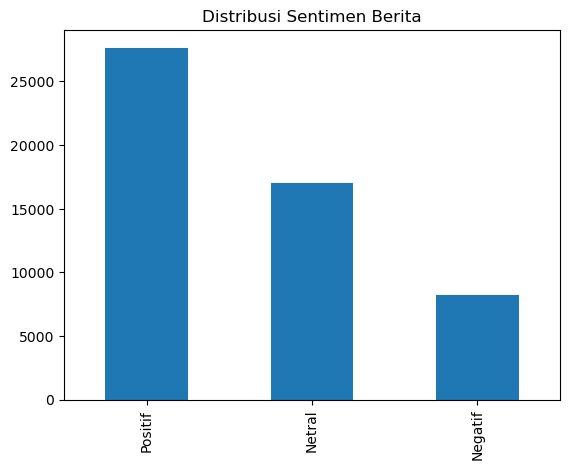

<Figure size 10000x9000 with 0 Axes>

In [18]:
ax = train['sentimen_berita'].value_counts()
bar_chart = ax.plot(kind='bar', title='Distribusi Sentimen Berita')

plt.figure(figsize=(100,90))
plt.show(bar_chart)

<AxesSubplot:title={'center':'Distribusi Sentimen Berita'}, ylabel='sentimen_berita'>

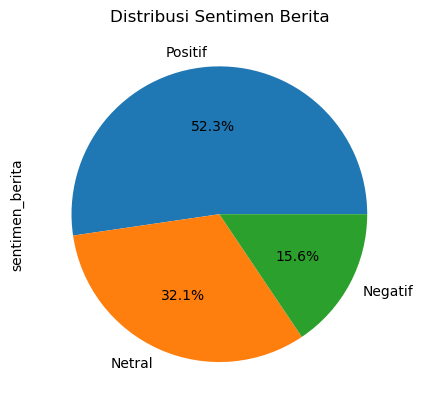

In [19]:
ax.plot(kind='pie', autopct = '%1.1f%%', title='Distribusi Sentimen Berita')

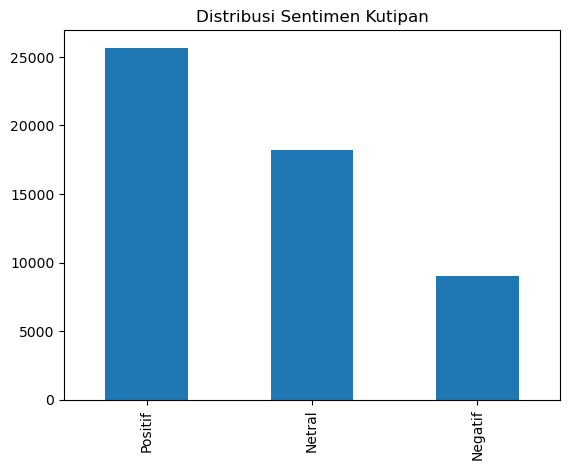

<Figure size 10000x9000 with 0 Axes>

In [20]:
ax = train['sentimen_kutipan'].value_counts()
bar_chart = ax.plot(kind='bar', title='Distribusi Sentimen Kutipan')

plt.figure(figsize=(100,90))
plt.show(bar_chart)

<AxesSubplot:title={'center':'Distribusi Sentimen Kutipan'}, ylabel='sentimen_kutipan'>

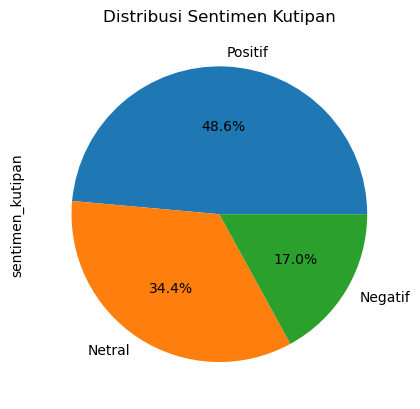

In [21]:
ax.plot(kind='pie', autopct = '%1.1f%%', title='Distribusi Sentimen Kutipan')

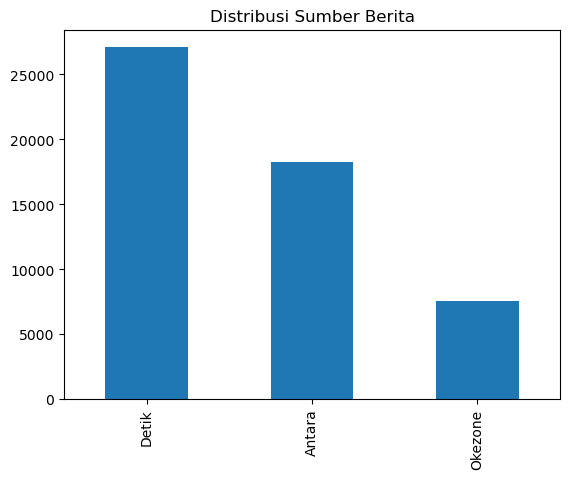

<Figure size 10000x9000 with 0 Axes>

In [22]:
ax = train['sumber'].value_counts()
bar_chart = ax.plot(kind='bar', title='Distribusi Sumber Berita')

plt.figure(figsize=(100,90))
plt.show(bar_chart)

<AxesSubplot:title={'center':'Distribusi Sumber Berita'}, ylabel='sumber'>

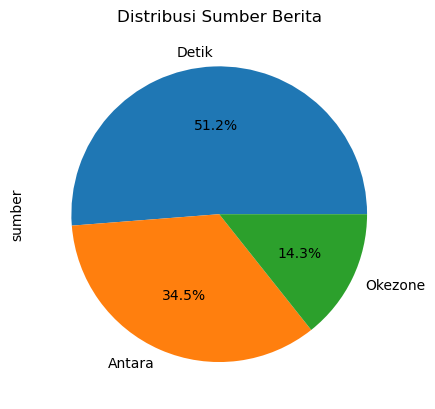

In [23]:
ax.plot(kind='pie', autopct = '%1.1f%%', title='Distribusi Sumber Berita')

# 3. Data Pre-Processing 

In [26]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    text = text.strip('[]')
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence


In [27]:
arr1 = ['judul_berita','konten_berita']
arr2 = ['nama_tokoh','jabatan','organisasi','lokasi','alias','kutipan']
arr3 = ['sentimen_kutipan','sentimen_berita']

In [28]:
for col in arr1:
    train[col] = train[col].apply(cleaningText)
    train[col] = train[col].apply(casefoldingText)
    train[col] = train[col].apply(tokenizingText)
    train[col] = train[col].apply(filteringText)
    train[col]= train[col].apply(toSentence)

In [29]:
for col in arr2:
    train[col] = train[col].apply(cleaningText)
    train[col] = train[col].apply(casefoldingText)
    train[col] = train[col].apply(tokenizingText)
    train[col] = train[col].apply(filteringText)
    train[col]= train[col].apply(toSentence)

In [30]:
for col in arr3:
    train[col] = train[col].replace(['Negatif'],-1)
    train[col] = train[col].replace(['Netral'],0)
    train[col] = train[col].replace(['Positif'],1)

In [33]:
train.head(10)

,id,sumber,kodekat,kodesubkat,kategori,subkategori,katakunci,tanggal,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita
0,00e3395ef29,Antara,J,J,Informasi dan Komunikasi,Informasi dan Komunikasi,Laporan keuangan,2021-02-05,asn penyeleweng dana infak masjid raya divonis...,padang oknum aparatur sipil negara asn pemprov...,rinto,hakim ketua yose,,padang sumbar provinsi sumbar inspektorat sumb...,dibayar ¬©,terdakwa terbukti sah bersalah tindak pidana k...,-1,-1
1,019a47ed0bc,Detik,A,A2,"Pertanian, Kehutanan, dan Perikanan",Kehutanan dan Penebangan Kayu,hasil hutan,2021-01-19,alasan mk kategorikan ganja hidroponik pohon k...,jakarta mahkamah konstitusi mk memasukkan ganj...,dengler recommended methods for i,,mahkamah konstitusi mk mk kbbi pohonpo¬∑hon n ...,jakarta yogyakarta manual,,,0,-1
2,01eb3258ed4,Antara,D,D1,Pengadaan Listrik dan Gas,Ketenagalistrikan,Listrik PLN,2021-03-31,angkasa pura maaf mati listrik bandara minangk...,padang pt angkasa pura ii pengelola bandara in...,ikhwan wahyudi adi lazuardi,,pt angkasa pura ii pln bim,padang sumbar kota padang kabupaten padang,¬©,permohonan maaf sebesarbesarnya pengguna jasa ...,-1,-1
3,02319ba7dbc,Okezone,J,J,Informasi dan Komunikasi,Informasi dan Komunikasi,Jumlah Penonton,2021-05-07,liga digelar kehadiran penonton pt lib gampang,jakarta ‚äì direktur utama pt lib akhmad hadia...,akhmad hadian lukita akhmad akhmad hadian joko...,direktur utama pt lib presiden,the jakmania kementerian pemuda olahraga kemen...,indonesia jakarta,,kajian lakukan gampang mesti mencari referensi...,0,-1
4,026dd5917f6,Detik,J,J,Informasi dan Komunikasi,Informasi dan Komunikasi,Laporan keuangan,2021-01-23,bill gates kuasai tanah pertanian netizen keta...,jakarta harta bill gates pendiri microsoft pem...,offut gates michael larson donald trump pengha...,,,jakarta amerika serikat amerika afrika as,,perusahaan memiliki tanah pertanian ancaman ke...,-1,-1
5,032a512e794,Okezone,H,H2,Transportasi dan Pergudangan,Angkutan Darat,banjir,2021-03-17,ancam anak golok haji ruli terancam dijemput p...,tangerang pagar beton milik haji ruli jalan ak...,tajur yanti fatima deonijiu ruli hadiyanti,,,tangerang pagar ciledug kota tangerang jakarta,,eksekusi pagar haji ruli pemanggilan ruli laku...,-1,-1
6,03a576b647a,Detik,D,D2,Pengadaan Listrik dan Gas,Pengadaan Gas dan Produksi Es,Konsumsi Gas,2021-01-08,efek bahaya minum kopi bikin stres picu kanker,jakarta kopi dikenal sederet manfaat sehatnya ...,,,,jakarta,,unik menyeruput kopi nasi kuning,1,-1
7,040dd529062,Detik,J,J,Informasi dan Komunikasi,Informasi dan Komunikasi,teknologi,2021-06-29,risiko transplantasi sel induk kian rendah pen...,jakarta tubuh manusia tersusun puluhan ribu se...,,,gvhd leksell gamma knife icon varian,jakarta asia tenggara healthcare standards ach...,,organ tubuh jantung hati paruparu ginjal memil...,1,-1
8,045bde75878,Detik,B,B3,Pertambangan dan Penggalian,Pertambangan Bijih Logam,harga emas,2021-02-23,bantu korban bencana mensos risma lelang mobil...,jakarta menteri sosial tri rismaharini melelan...,tri rismaharini bantuan joko widodo jokowi,menteri sosial presiden,kementerian sosial batik air kementerian pu,jakarta jakarta selatan kabupaten bekasi,,sesuai undangundang undangundang mengatur undi...,0,-1
9,04adbfa2838,Antara,J,J,Informasi dan Komunikasi,Informasi dan Komunikasi,teknologi,2021-01-06,digitalisasi aksara daerah dukungan pemerintah,jakarta digitalisasi aksara daerah digalakkan ...,muhammad yusuf yusuf suryanto ida nurcahyani,direktur eksekutif culuture and folks for indo...,,jakarta jawa indonesia jawa yogyakarta,¬©,pasalnya digitalisasi aksara jawa diwujudkan d...,1,-1


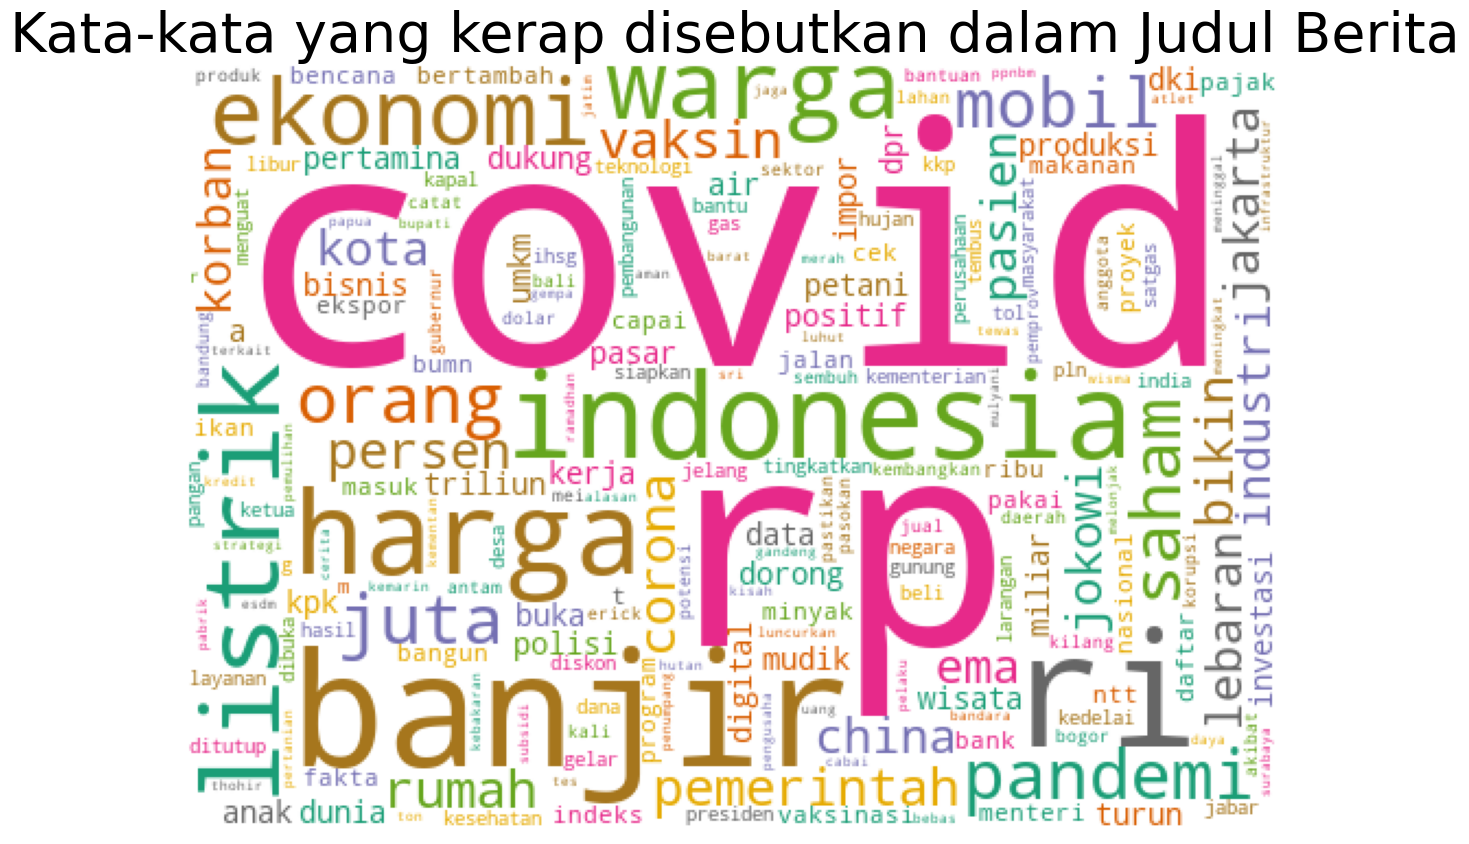

In [32]:
plt.figure(figsize=(20,10))
text_result = train.judul_berita.values
stop_words=['yang, atau, karena, sebab’']
cloud1=WordCloud(stopwords=stop_words, background_color='white',colormap="Dark2",width=501,height=352,collocations=False).generate(" ".join(text_result))

plt.axis('off')
plt.title("Kata-kata yang kerap disebutkan dalam Judul Berita",fontsize=40)
plt.imshow(cloud1)

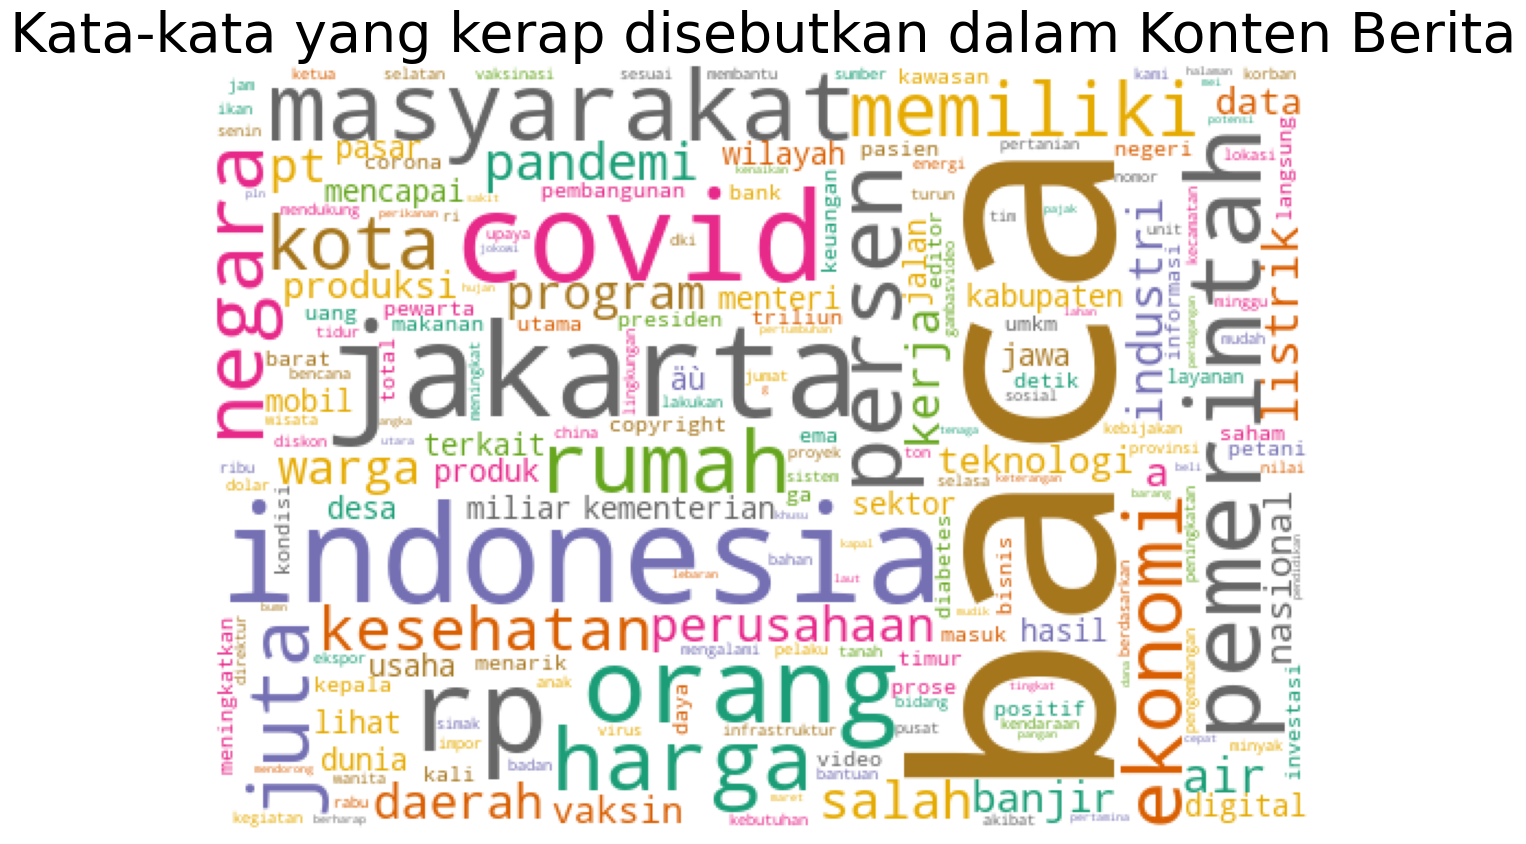

In [34]:
plt.figure(figsize=(20,10))
text_result = train.konten_berita.values
stop_words=['yang, atau, karena, sebab’']
cloud2=WordCloud(stopwords=stop_words, background_color='white',colormap="Dark2",width=501,height=352,collocations=False).generate(" ".join(text_result))

plt.axis('off')
plt.title("Kata-kata yang kerap disebutkan dalam Konten Berita",fontsize=40)
plt.imshow(cloud2)

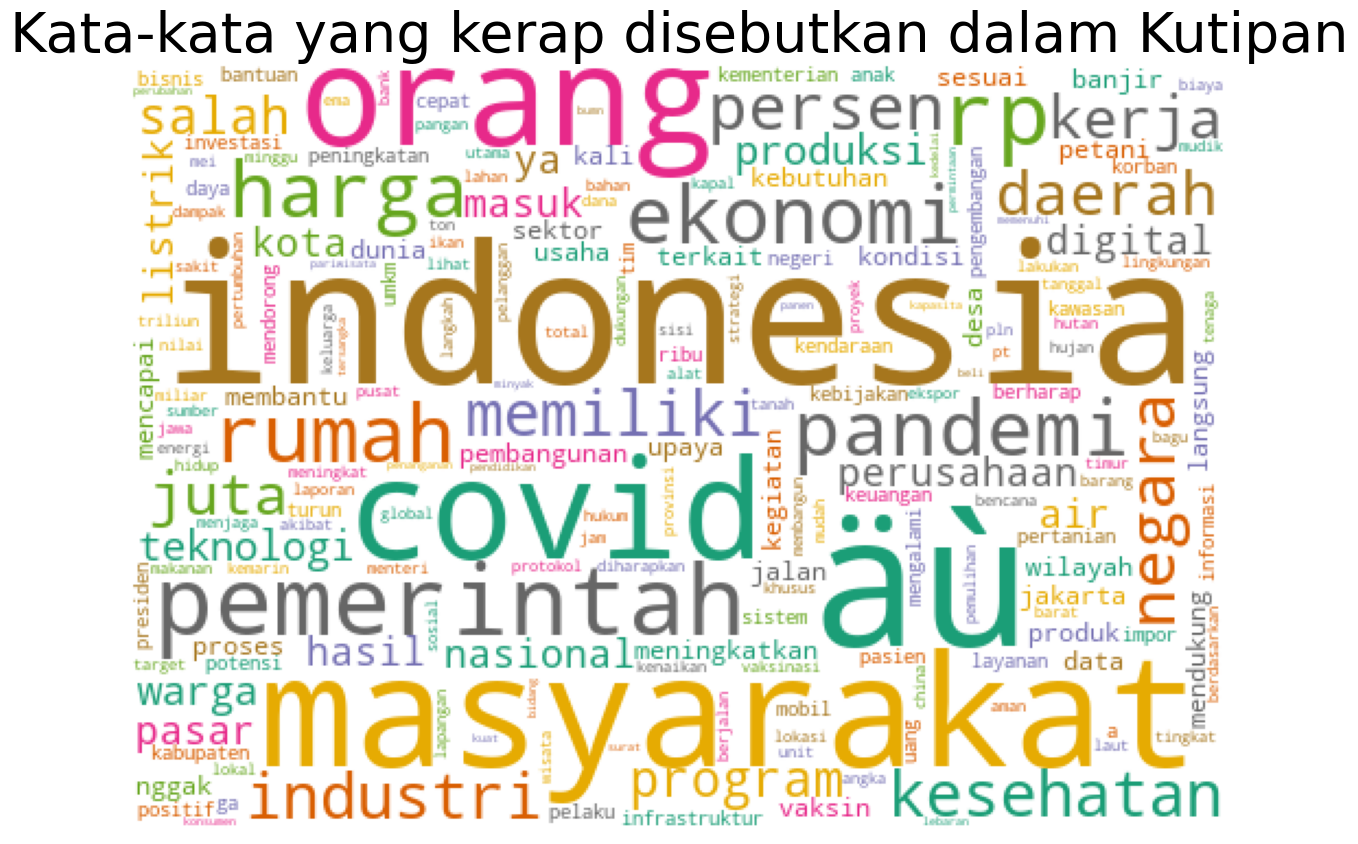

In [32]:
plt.figure(figsize=(20,10))
text_result = train.kutipan.values
stop_words=['yang, atau, karena, sebab’']
cloud3=WordCloud(stopwords=stop_words, background_color='white',colormap="Dark2",width=501,height=352,collocations=False).generate(" ".join(text_result))

plt.axis('off')
plt.title("Kata-kata yang kerap disebutkan dalam Kutipan",fontsize=40)
plt.imshow(cloud3)

# 4. Feature Extraction Part I (News Title Feature)

In [35]:
# CVT Judul Berita
X = train['judul_berita']
y = train['sentimen_berita']

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(42311,) (42311,)
(10578,) (10578,)


In [37]:
vect = CountVectorizer()

In [38]:
X_train = vect.fit_transform(X_train)
X_valid = vect.transform(X_valid)
# examine the document-term matrix
print(X_train.shape)
print(X_valid.shape)

(42311, 22442)
(10578, 22442)


In [39]:
y_valid.shape

(10578,)

In [40]:
y_train.shape

(42311,)

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train)
tfidf_transformer.transform(X_train)
X_train.shape

(42311, 22442)

In [43]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_valid)
tfidf_transformer.transform(X_valid)
X_valid.shape

(10578, 22442)

# 5. Modelling Part I

In [44]:
#Naive Bayes
naivebayes = MultinomialNB()
X_train_nb = np.nan_to_num(X_train)
y_train_nb = np.nan_to_num(y_train)
naivebayes.fit(X_train_nb, y_train_nb)

MultinomialNB()

In [46]:
y_pred_class = naivebayes.predict(X_valid)

In [48]:
from sklearn import metrics
print('Akurasi: ', metrics.accuracy_score(y_valid, y_pred_class))
print('Precision: ', metrics.precision_score(y_valid, y_pred_class,average='weighted')),
print('Recall: ', metrics.recall_score(y_valid, y_pred_class, average='weighted')),
print('F1 Score: ', metrics.f1_score(y_valid, y_pred_class, average='weighted'))

Akurasi:  0.627906976744186
Precision:  0.617560698960672
Recall:  0.627906976744186
F1 Score:  0.6207713855722721


In [49]:
# Logistic Regression
logisticregression = LogisticRegression(solver='liblinear')
logisticregression.fit(X_train_nb, y_train_nb)

LogisticRegression(solver='liblinear')

In [50]:
y_pred_class = logisticregression.predict(X_valid)

In [51]:
print('Akurasi: ', metrics.accuracy_score(y_valid, y_pred_class))
print('Precision: ', metrics.precision_score(y_valid, y_pred_class,average='weighted')),
print('Recall: ', metrics.recall_score(y_valid, y_pred_class, average='weighted')),
print('F1 Score: ', metrics.f1_score(y_valid, y_pred_class, average='weighted'))

Akurasi:  0.6526753639629419
Precision:  0.6420200310515791
Recall:  0.6526753639629419
F1 Score:  0.6403736466333934


In [60]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_nb, y_train_nb)

DecisionTreeClassifier()

In [61]:
y_pred_class = decisiontree.predict(X_valid)

In [62]:
print('Akurasi: ', metrics.accuracy_score(y_valid, y_pred_class))
print('Precision: ', metrics.precision_score(y_valid, y_pred_class,average='weighted')),
print('Recall: ', metrics.recall_score(y_valid, y_pred_class, average='weighted')),
print('F1 Score: ', metrics.f1_score(y_valid, y_pred_class, average='weighted'))

Akurasi:  0.6674229532993005
Precision:  0.662586363298737
Recall:  0.6674229532993005
F1 Score:  0.6639936642343082


In [52]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
randomforest = RandomForestClassifier()
randomforest.fit(X_train_nb, y_train_nb)

RandomForestClassifier()

In [53]:
y_pred_class = randomforest.predict(X_valid)

In [54]:
print('Akurasi: ', metrics.accuracy_score(y_valid, y_pred_class))
print('Precision: ', metrics.precision_score(y_valid, y_pred_class,average='weighted')),
print('Recall: ', metrics.recall_score(y_valid, y_pred_class, average='weighted')),
print('F1 Score: ', metrics.f1_score(y_valid, y_pred_class, average='weighted'))

Akurasi:  0.704859141614672
Precision:  0.7014427164924553
Recall:  0.704859141614672
F1 Score:  0.6932224405203915


# 4. Feature Extraction Part II (News Content)

In [73]:
# CVT Konten Berita
X = train['konten_berita']
y = train['sentimen_berita']

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(42311,) (42311,)
(10578,) (10578,)


In [75]:
vect = CountVectorizer()

In [76]:
X_train = vect.fit_transform(X_train)
X_valid = vect.transform(X_valid)
# examine the document-term matrix
print(X_train.shape)
print(X_valid.shape)

(42311, 154534)
(10578, 154534)


In [77]:
y_valid.shape

(10578,)

In [78]:
y_train.shape

(42311,)

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train)
tfidf_transformer.transform(X_train)
X_train.shape

(42311, 154534)

In [80]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_valid)
tfidf_transformer.transform(X_valid)
X_valid.shape

(10578, 154534)

# Modelling Part II

In [81]:
#Naive Bayes
naivebayes = MultinomialNB()
X_train_nb = np.nan_to_num(X_train)
y_train_nb = np.nan_to_num(y_train)
naivebayes.fit(X_train_nb, y_train_nb)

MultinomialNB()

In [82]:
y_pred_class = naivebayes.predict(X_valid)

In [83]:
from sklearn import metrics
print('Akurasi: ', metrics.accuracy_score(y_valid, y_pred_class))
print('Precision: ', metrics.precision_score(y_valid, y_pred_class,average='weighted')),
print('Recall: ', metrics.recall_score(y_valid, y_pred_class, average='weighted')),
print('F1 Score: ', metrics.f1_score(y_valid, y_pred_class, average='weighted'))

Akurasi:  0.628757799205899
Precision:  0.6369653412864619
Recall:  0.628757799205899
F1 Score:  0.6308364306868625


In [84]:
# Logistic Regression
logisticregression = LogisticRegression(solver='liblinear')
logisticregression.fit(X_train_nb, y_train_nb)

/Users/rabbanikumoro/tensorflow-test/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LogisticRegression(solver='liblinear')

In [85]:
y_pred_class = logisticregression.predict(X_valid)

In [86]:
print('Akurasi: ', metrics.accuracy_score(y_valid, y_pred_class))
print('Precision: ', metrics.precision_score(y_valid, y_pred_class,average='weighted')),
print('Recall: ', metrics.recall_score(y_valid, y_pred_class, average='weighted')),
print('F1 Score: ', metrics.f1_score(y_valid, y_pred_class, average='weighted'))

Akurasi:  0.7370013235016071
Precision:  0.7340206767576829
Recall:  0.7370013235016071
F1 Score:  0.7352080626245692


In [87]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_nb, y_train_nb)

DecisionTreeClassifier()

In [88]:
y_pred_class = decisiontree.predict(X_valid)

In [89]:
print('Akurasi: ', metrics.accuracy_score(y_valid, y_pred_class))
print('Precision: ', metrics.precision_score(y_valid, y_pred_class,average='weighted')),
print('Recall: ', metrics.recall_score(y_valid, y_pred_class, average='weighted')),
print('F1 Score: ', metrics.f1_score(y_valid, y_pred_class, average='weighted'))

Akurasi:  0.7197012667801097
Precision:  0.7206232288553037
Recall:  0.7197012667801097
F1 Score:  0.7199889293964131


In [90]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
randomforest = RandomForestClassifier()
randomforest.fit(X_train_nb, y_train_nb)

RandomForestClassifier()

In [91]:
y_pred_class = randomforest.predict(X_valid)

In [92]:
print('Akurasi: ', metrics.accuracy_score(y_valid, y_pred_class))
print('Precision: ', metrics.precision_score(y_valid, y_pred_class,average='weighted')),
print('Recall: ', metrics.recall_score(y_valid, y_pred_class, average='weighted')),
print('F1 Score: ', metrics.f1_score(y_valid, y_pred_class, average='weighted'))

Akurasi:  0.751937984496124
Precision:  0.760506943423939
Recall:  0.751937984496124
F1 Score:  0.7372611523951786
